# Bike Sharing Assignment

In [408]:
# Let's import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [409]:
# Import the dataset
data = pd.read_csv('day.csv',index_col='instant') #Since "instant" column is an index
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Analysing the dataset and formatting it for model building

In [410]:
# Looking at the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


No nulls in the data. We can see that there are some columns with integer data type when it should be a categorical column.

We need to convert this data to the correct format as the model will interpret the integers differently, instead of categorical and the prediction output will be entirely different than the actual values.

In [411]:
# Check the season column for values other than 1, 2, 3 or 4
data.season.unique()

array([1, 2, 3, 4])

In [412]:
# Changing the season column to a categorical column
# Creating a function to return the respective season category
def seasoncat(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

data.season = data.season.apply(seasoncat)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [413]:
# Check the yr column for values other than 0 or 1
data.yr.unique()

array([0, 1])

In [414]:
#Change the yr column to yr_2019: 1 if year is 2019 and 0 if year is 2018
data.rename(columns={'yr':'yr_2019'},inplace=True)
data.yr_2019 = data.yr_2019

In [415]:
# Check the weekday column for unwanted values
data.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [416]:
# Changing the weekday column to categorical column
# Creating a mapping dictionary to map each value in the weekday column
weekday_dict = {0: 'SUN', 1: 'MON', 2: 'TUE', 3: 'WED', 4: 'THU', 5: 'FRI', 6: 'SAT'}

data.weekday = data.weekday.map(weekday_dict)
data.head()

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,MON,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,TUE,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,WED,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,THU,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,FRI,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [417]:
#Check weathersit column for values other than 1, 2, 3 or 4
data.weathersit.unique()

array([2, 1, 3])

In [418]:
# Changing the weathersit column to categorical
# Creating a function to return the respective weather situation
def weathersituation(x):
    if x==1:
        return 'Clr'
    elif x==2:
        return 'Mist'
    elif x==3:
        return 'L_S/R'
    else:
        return 'H_S/R'
data.weathersit = data.weathersit.apply(weathersituation)
data.head()

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,MON,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,TUE,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,WED,1,Clr,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,THU,1,Clr,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,FRI,1,Clr,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [419]:
# Changing the mnth column to categorical
# Creating a dictionary to map the respective month
month_dict = {1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL',8: 'AUG',9: 'SEP',10: 'OCT',11: 'NOV',12: 'DEC'}

data.mnth = data.mnth.map(month_dict)
data.head()

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,JAN,0,MON,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,JAN,0,TUE,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,JAN,0,WED,1,Clr,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,JAN,0,THU,1,Clr,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,JAN,0,FRI,1,Clr,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [420]:
# Changing the holiday (1 for holiday and 0 for normal day) and workingday (1 for workingday and 0 for non-workingday) column to categories
data[['holiday','workingday']] = data[['holiday','workingday']]

## EDA on the data

Let's see understand the data by visualising them using plots

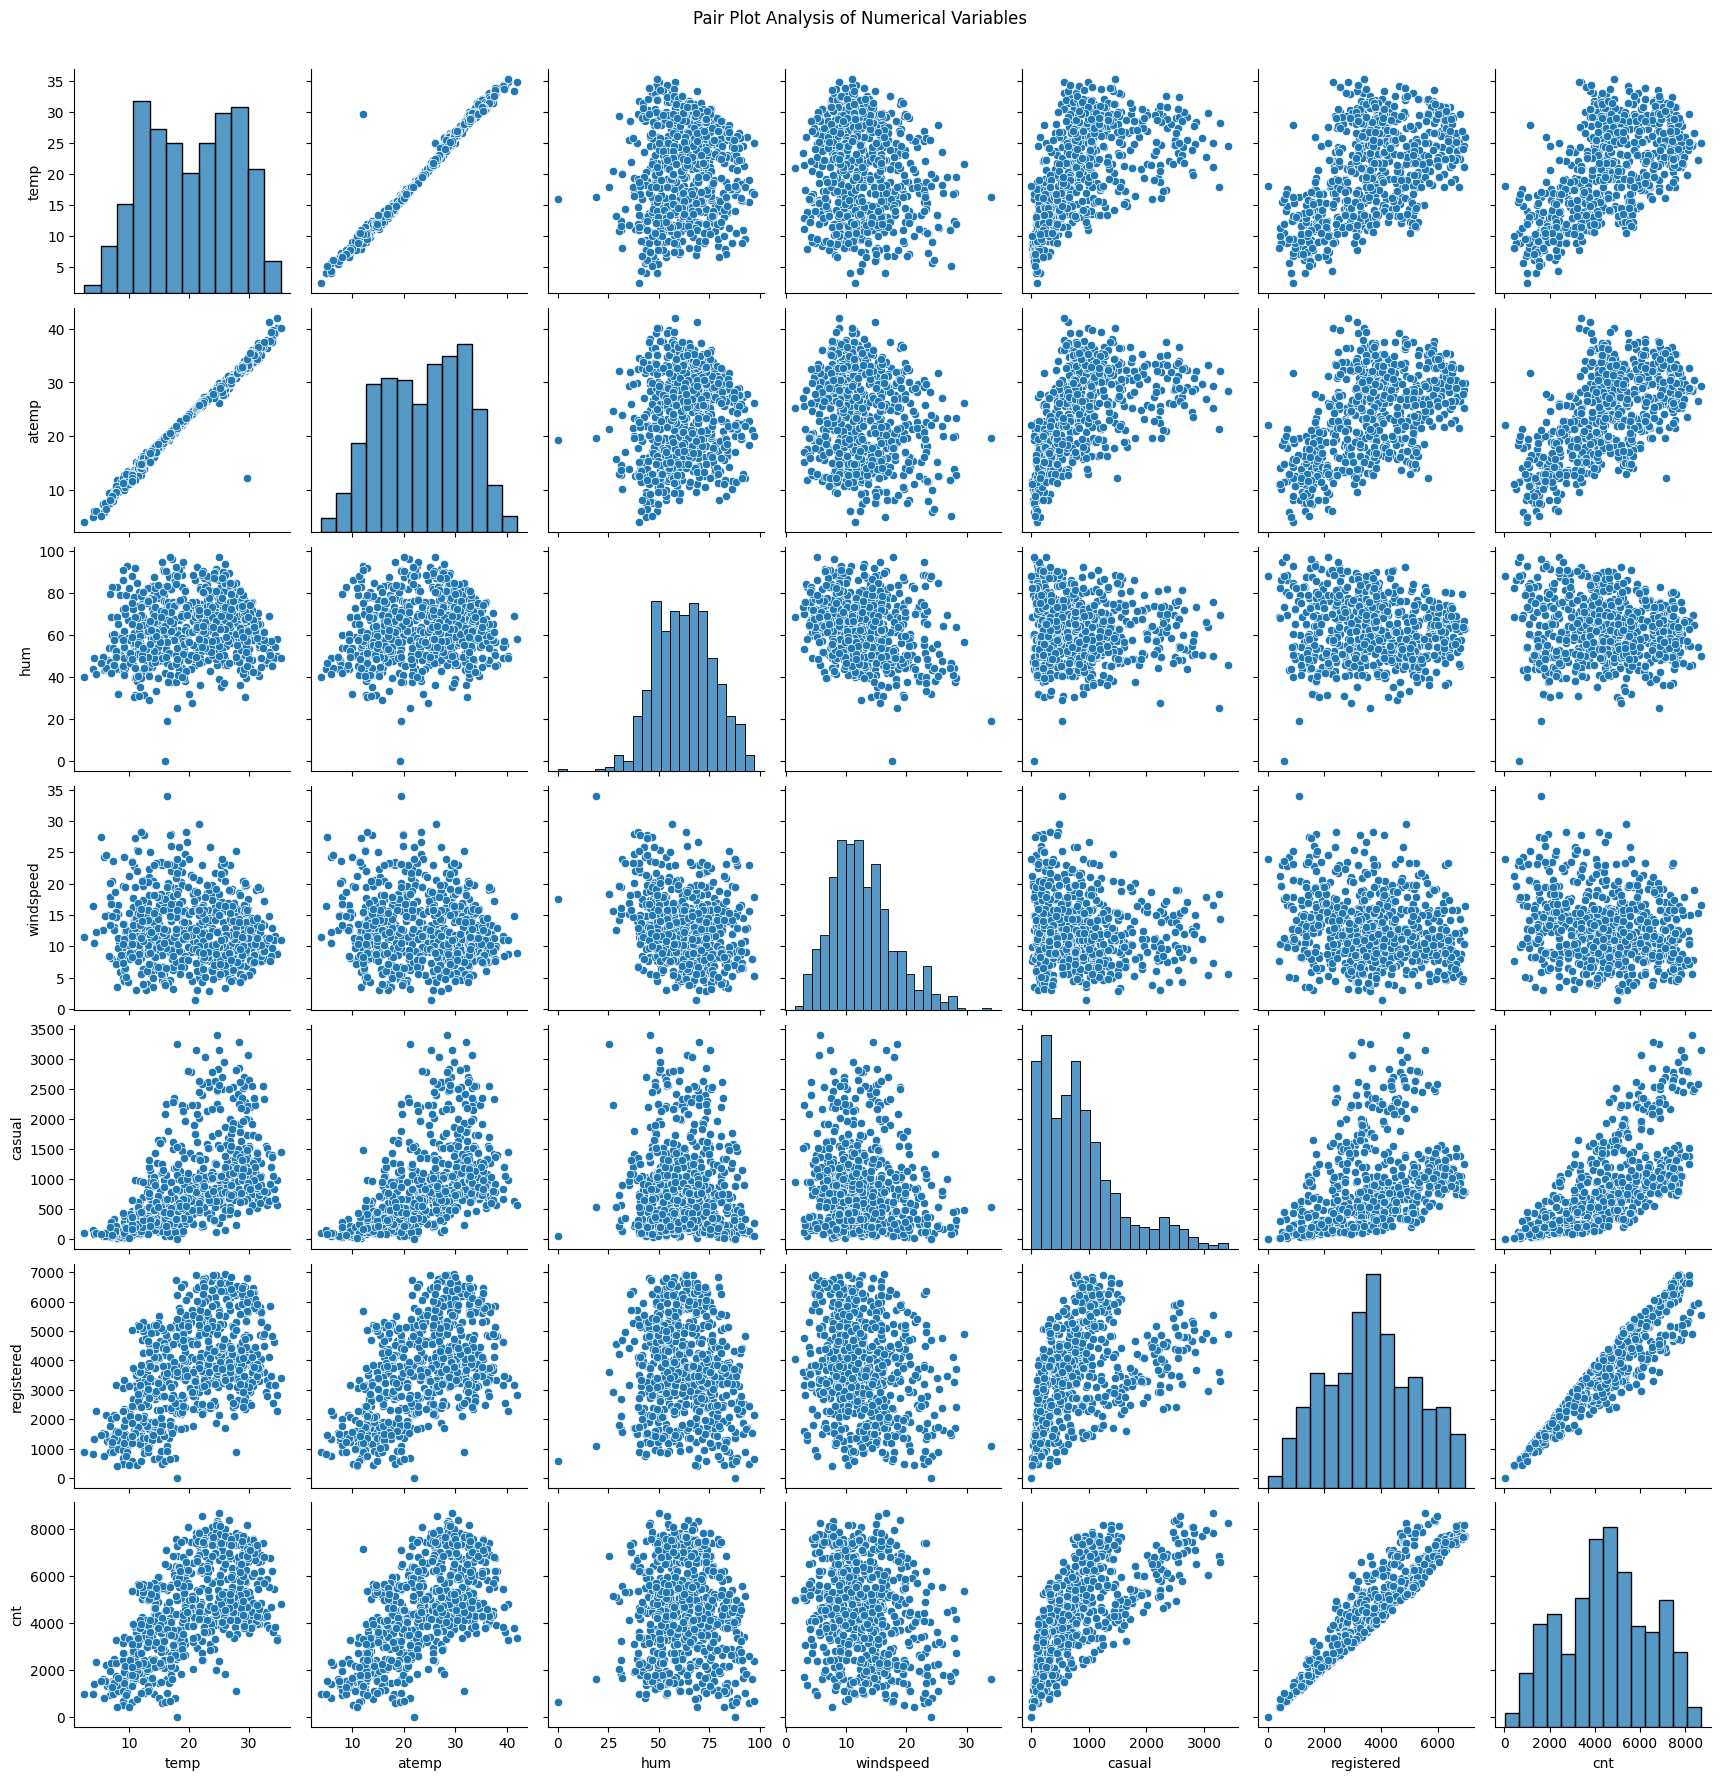

In [421]:
# Check the pairplot of the numerical variables
num_vars = data[['temp','atemp','hum','windspeed','casual','registered','cnt']]
pair_plot = sns.pairplot(num_vars)
pair_plot.fig.suptitle('Pair Plot Analysis of Numerical Variables', y=1.02)
plt.show()

There is a perfect linear relationship between "temp" and "atemp" columns. Also the "registered" column and the output variable "cnt" have a good linear relationship. It is because the "cnt" is the sum of "casual" and "registered" columns.

We can better understand the relationships between variables using a heatmap of these numerical variables

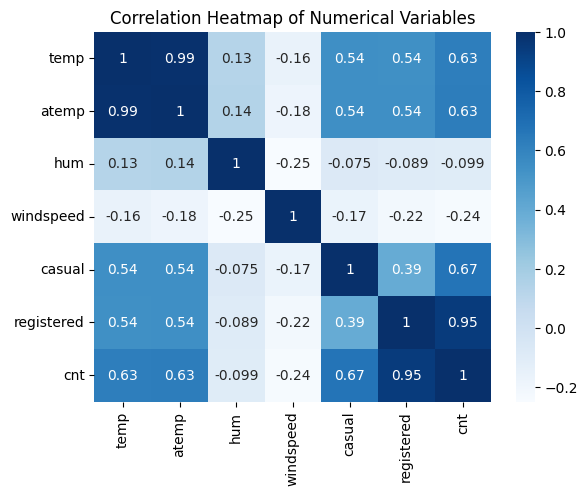

In [422]:
sns.heatmap(num_vars.corr(), annot=True,cmap='Blues')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

From the above also, it is seen that the "temp" and "atemp" column have a high correlation of almost 1. This collinearity between the independent variables causes misinterpretation of the coefficients the model gives. Hence we can drop the "atemp" variable.

Also, the dependent variable "cnt" is highly correlated to the variable "registered", as we saw in the pairplot before. Since "cnt" is apparently the sum of "casual" and "registered" columns, we can drop these columns.

In [423]:
data = data.drop(['atemp','casual','registered'],axis=1)
data.head()

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,01-01-2018,spring,0,JAN,0,MON,1,Mist,14.110847,80.5833,10.749882,985
2,02-01-2018,spring,0,JAN,0,TUE,1,Mist,14.902598,69.6087,16.652113,801
3,03-01-2018,spring,0,JAN,0,WED,1,Clr,8.050924,43.7273,16.636703,1349
4,04-01-2018,spring,0,JAN,0,THU,1,Clr,8.200000,59.0435,10.739832,1562
5,05-01-2018,spring,0,JAN,0,FRI,1,Clr,9.305237,43.6957,12.522300,1600


From the heatmap, we could also see that the windspeed and humidity are negatively correlated (-0.25). This may also affect the multicollinearity. We can further check it in the future steps (VIF)

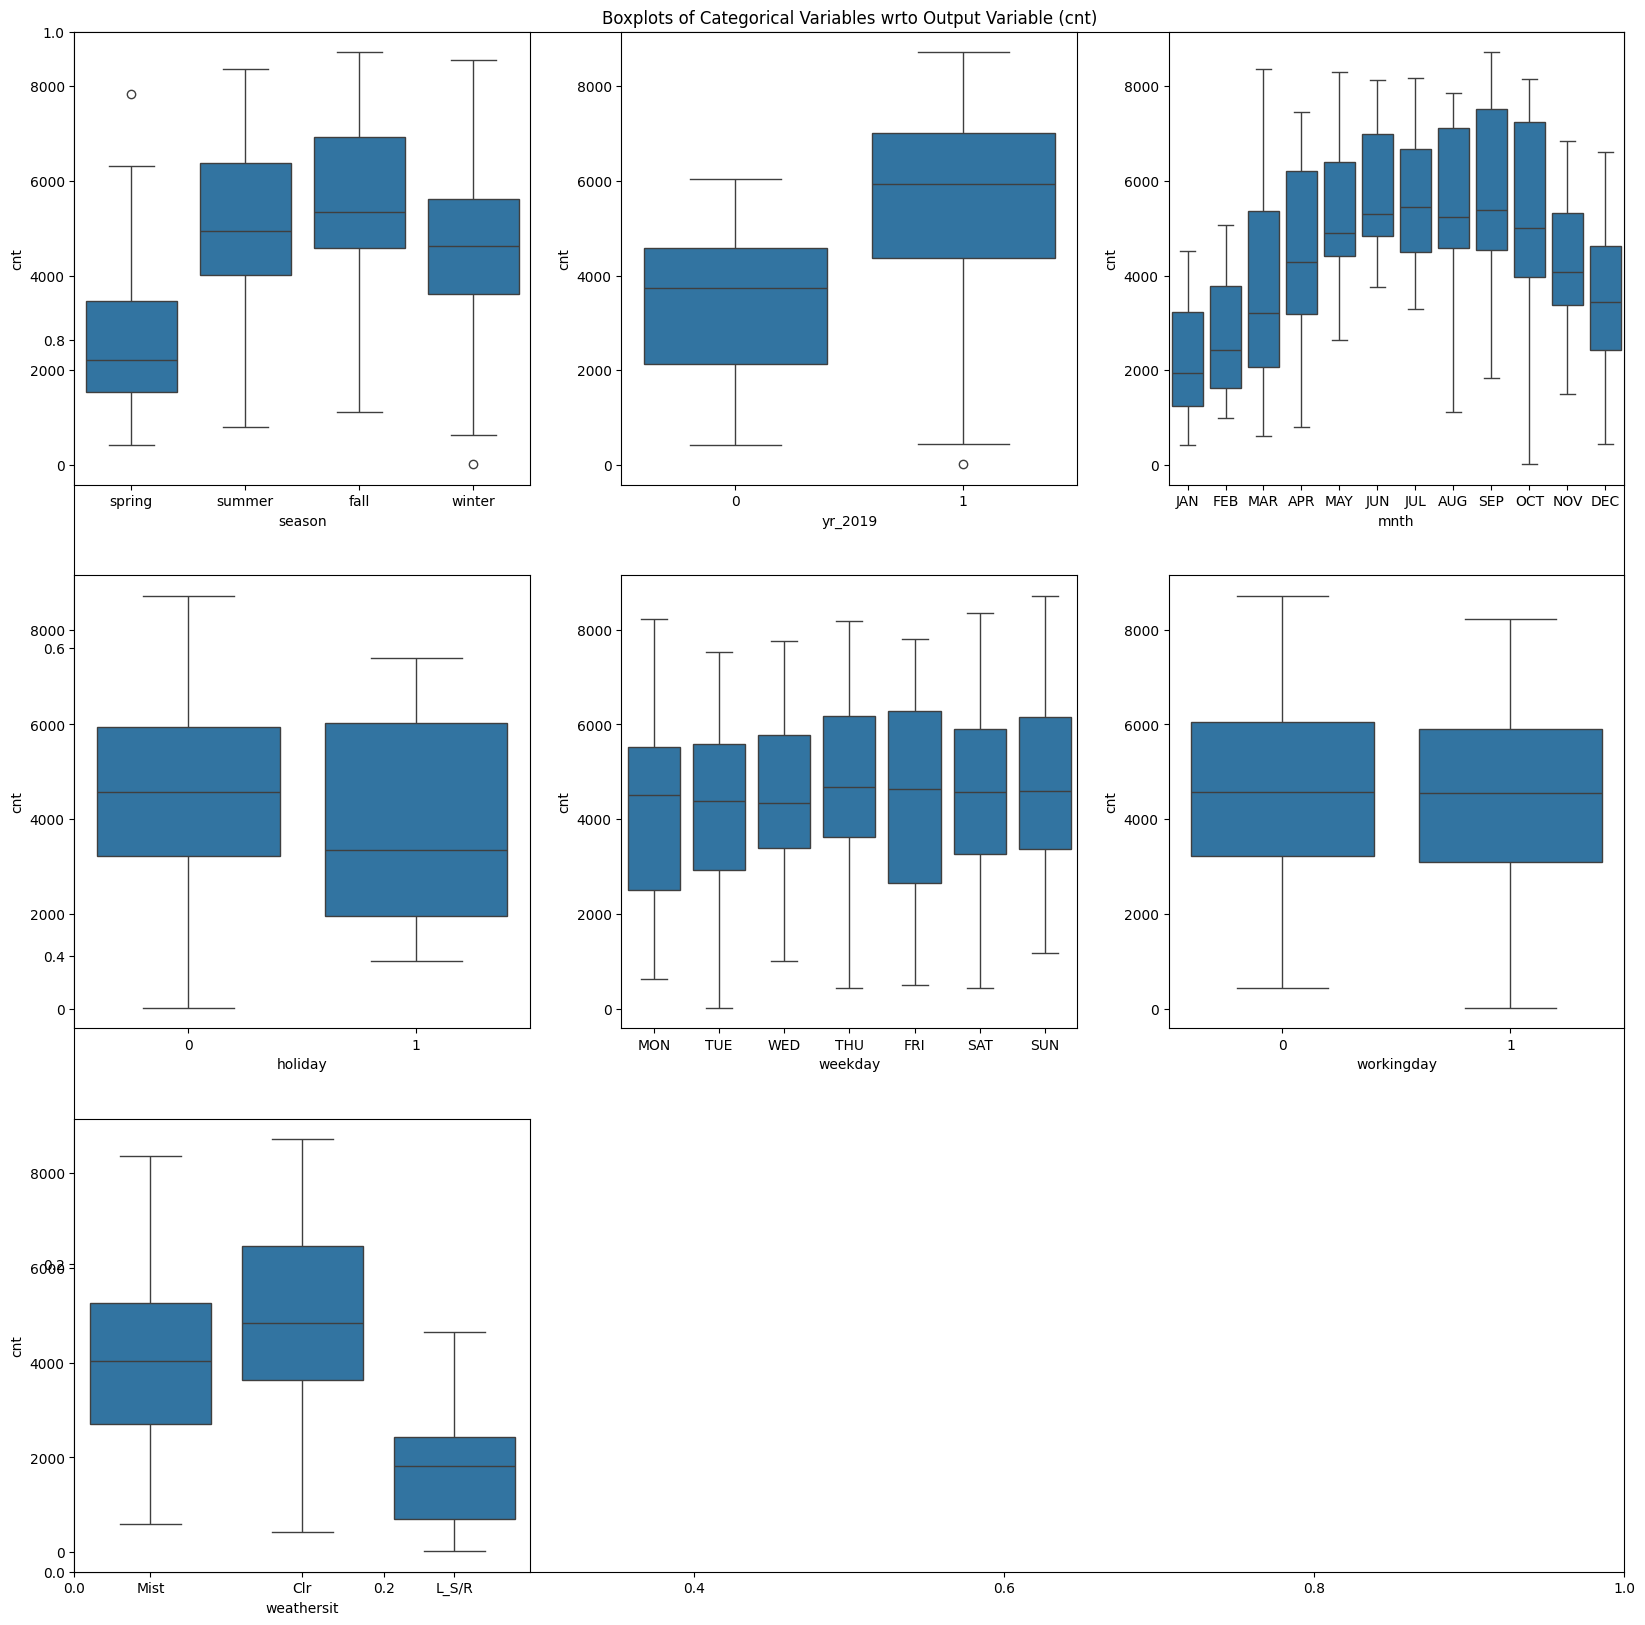

In [424]:
# Let's see the plots for the categorical variables

cat_vars = data[['season','yr_2019','mnth','holiday','weekday','workingday','weathersit']]

plt.figure(figsize=(20,20))
plt.title('Boxplots of Categorical Variables wrto Output Variable (cnt)')
for i,j in zip(range(1,8),cat_vars.columns):
    plt.subplot(3,3,i)
    sns.boxplot(x=j,y='cnt',data=data)
plt.show()

Some insights from the above plot:
1. Most of the bike rentals happened in summer and fall seasons, starting from mid-summer till the end of fall season (as seen from the month column plot).
2. Year 2019 had most of the bike rentals.
3. Non-Holidays and non-working days, i.e., Weekends (Saturday and Sunday) had the most rentals.
4. People preferred using a bike more on Clear/Slightly cloudy days, or with a slight misty conditions, but definitely not on rainy/snowing days.

It is obvious that we don't need the date column as the information required to us is available in the 'mnth' and 'yr_2019' columns. Hence we can drop this column

In [425]:
# Drop dteday column
data = data.drop('dteday',axis=1)
data.head()

,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,JAN,0,MON,1,Mist,14.110847,80.5833,10.749882,985
2,spring,0,JAN,0,TUE,1,Mist,14.902598,69.6087,16.652113,801
3,spring,0,JAN,0,WED,1,Clr,8.050924,43.7273,16.636703,1349
4,spring,0,JAN,0,THU,1,Clr,8.200000,59.0435,10.739832,1562
5,spring,0,JAN,0,FRI,1,Clr,9.305237,43.6957,12.522300,1600


Now we will change the categorical columns to dummy columns so that we can incorporate these variables in the model.

In [426]:
# We will change the columns 'season', 'mnth', 'weekday' and 'weathersit' to dummies. The other columns like 'yr_2019', 'holiday', 'workingday' already are in binary form. 
str_var = cat_vars.select_dtypes('object')
str_var

,season,mnth,weekday,weathersit
instant,,,,
1,spring,JAN,MON,Mist
2,spring,JAN,TUE,Mist
3,spring,JAN,WED,Clr
4,spring,JAN,THU,Clr
5,spring,JAN,FRI,Clr
...,...,...,...,...
726,spring,DEC,FRI,Mist
727,spring,DEC,SAT,Mist
728,spring,DEC,SUN,Mist


In [427]:
# Let's create dummies for these columns
str_var_df = pd.get_dummies(str_var, drop_first=True,dtype='int')
str_var_df

,season_spring,season_summer,season_winter,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,mnth_JUN,mnth_MAR,...,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [428]:
# Let's add this dummy variables to the main data
data = pd.concat([data,str_var_df],axis=1)
data

,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,0,JAN,0,MON,1,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
2,spring,0,JAN,0,TUE,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
3,spring,0,JAN,0,WED,1,Clr,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,JAN,0,THU,1,Clr,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
5,spring,0,JAN,0,FRI,1,Clr,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,spring,1,DEC,0,FRI,1,Mist,10.420847,65.2917,23.458911,...,0,0,0,0,0,0,0,0,0,1
727,spring,1,DEC,0,SAT,0,Mist,10.386653,59.0000,10.416557,...,0,0,0,1,0,0,0,0,0,1
728,spring,1,DEC,0,SUN,0,Mist,10.386653,75.2917,8.333661,...,0,0,0,0,1,0,0,0,0,1


In [429]:
# Let's drop the categorical variables for which we have created the dummies
data = data.drop(str_var,axis=1)
data

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,0,1,0,0,0,0,1


## Data Modelling

First, we need to split the data into training data and test data. The model will be trained on the training data and the evaluated on the predictions made from the test data.

We will need to import the required libraries to perform the same

In [430]:
# Let's import the required libraries to do the same
from sklearn.model_selection import train_test_split

In [431]:
# We will split our data in the ratio of 0.7:0.3, considering the data is not huge enough to have a small test data.
data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=42) # Answer to the Ultimate Question of Life, the Universe, and Everything is 42 ;)

In [432]:
data_train

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
684,1,0,1,13.188347,62.0417,10.250129,5445,0,0,1,...,0,0,0,0,0,0,0,0,0,1
646,1,1,0,15.716653,70.9583,12.708493,5478,0,0,1,...,1,0,0,0,0,0,1,0,0,1
164,0,0,1,26.035000,49.4583,20.458450,5020,0,1,0,...,0,0,0,0,0,0,0,1,0,0
361,0,0,1,13.325000,76.2500,12.626150,1162,1,0,0,...,0,0,0,0,0,1,0,0,0,1
641,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1,0,1,14.247500,82.3333,8.333393,4649,0,0,1,...,0,0,1,0,0,0,0,0,0,1
72,0,0,1,15.758268,52.7391,18.130468,2417,1,0,0,...,0,0,0,0,0,0,1,0,0,0
107,0,0,1,18.723347,47.9583,20.334232,3744,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [433]:
data_test

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
469,1,0,0,20.295000,50.2917,12.791439,7460,0,1,0,...,0,0,0,0,1,0,0,0,0,0
149,0,0,1,27.367500,81.8750,14.333846,4788,0,1,0,...,0,0,0,0,0,0,1,0,0,0
303,0,0,1,13.085847,62.3750,11.833339,3331,0,0,1,...,1,0,0,0,0,0,1,0,0,0
356,0,0,0,17.356653,75.7500,3.167425,3068,1,0,0,...,0,0,0,1,0,0,0,0,0,1
516,1,0,1,27.880000,49.2917,13.083693,7338,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0,0,1,18.791653,83.0833,17.292164,2914,0,0,1,...,0,0,0,0,0,1,0,0,0,1
533,1,0,1,24.292500,59.8750,9.708568,6978,0,1,0,...,0,0,1,0,0,0,0,0,0,0
559,1,0,0,29.998347,48.5833,5.416950,7499,0,0,0,...,0,0,0,1,0,0,0,0,0,1


We need to scale the values so that the model can converge fastly to the coeeficients and interpretation of the variable coefficients would be improved.

This is done on the training data and the test data uses the same scaling factors of the training data to avoid any data leakage.

In [434]:
# Let's import the required libraries for it. Using MinMaxScaler as the scaling method.
from sklearn.preprocessing import MinMaxScaler

In [435]:
# Initialising the scaler instance
scale = MinMaxScaler()

In [436]:
# Let's scale the training dataset. We can include all variables since the dummy variables are already in the scaled version (0 to 1) and scaling them again will not affect their values.
data_train[[i for i in data_train.columns]] = scale.fit_transform(data_train[[i for i in data_train.columns]])
data_train.describe()

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_L_S/R,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.698039,0.551091,0.653801,0.414566,0.498206,0.231373,0.256863,0.250980,...,0.090196,0.090196,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333,0.029412,0.345098
std,0.500025,0.163554,0.459559,0.227401,0.143542,0.185671,0.233905,0.422124,0.437332,0.434003,...,0.286744,0.286744,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.544033,0.281934,0.345950,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.659296,0.383964,0.502233,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.756762,0.525698,0.677080,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [437]:
# Dividing the training dataset to X and y
y_train = data_train.cnt
X_train = data_train.drop('cnt',axis=1)
X_train

,yr_2019,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_AUG,...,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
684,1.0,0.0,1.0,0.327133,0.639330,0.327101,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
646,1.0,1.0,0.0,0.403972,0.731215,0.419004,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
164,0.0,0.0,1.0,0.717562,0.509660,0.708724,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
361,0.0,0.0,1.0,0.331287,0.785745,0.415925,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
641,1.0,0.0,1.0,0.745598,0.817947,0.110593,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1.0,0.0,1.0,0.359323,0.848432,0.255447,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.0,0.0,1.0,0.405237,0.543468,0.621696,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
107,0.0,0.0,1.0,0.495350,0.494203,0.704080,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


We have our X and y variables ready. Let's build a model including all the variables and see how well it could fit.

In [438]:
# Importing the required libraries
import statsmodels.api as sm

In [439]:
#Creating a function to build a statsmodel LR model

def smmodel(df):
    # Add constant because it allows the model to estimate an intercept, improving the fit.
    X_train_lr0 = sm.add_constant(df)
    smlr=sm.OLS(y_train,X_train_lr0).fit()
    return smlr

In [440]:
# Let's see how good this model is 
smmodel(X_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     94.26
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.22e-175
Time:                        22:14:21   Log-Likelihood:                 494.58
No. Observations:                 510   AIC:                            -931.2
Df Residuals:                     481   BIC:                            -808.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3362      0.114      2.958      0.003       0.113       0.560
yr_2019              0.2357      0.009     27.376      0.000       0.219       0.253
holiday             -0.0714      0.097     -0.738      0.461      -0.261       0.119
workingday          -0.0031      0.101     -0.031      0.976      -0.201       0.195
temp                 0.4418      0.049      8.987      0.000       0.345       0.538
hum                 -0.1607      0.041     -3.874      0.000      -0.242      -0.079
windspeed           -0.1205      0.025     -4.768      0.000      -0.170      -0.071
season_spring       -0.1479      0.033     -4.510      0.000      -0.212      -0.083
season_summer        0.0133      0.027      0.485      0.628      -0.040       0.067
season_winter        0.0744      0.028      2.676      0.008       0.020       0.129
mnth_AUG            -0.0121      0.036     -0.336      0.737      -0.083       0.059
mnth_DEC            -0.0377      0.037     -1.024      0.306      -0.110       0.035
mnth_FEB             0.0140      0.037      0.373      0.709      -0.060       0.087
mnth_JAN            -0.0002      0.038     -0.004      0.996      -0.075       0.075
mnth_JUL            -0.0452      0.036     -1.239      0.216      -0.117       0.027
mnth_JUN            -0.0016      0.026     -0.062      0.950      -0.052       0.049
mnth_MAR             0.0500      0.029      1.700      0.090      -0.008       0.108
mnth_MAY             0.0285      0.022      1.321      0.187      -0.014       0.071
mnth_NOV            -0.0493      0.039     -1.265      0.207      -0.126       0.027
mnth_OCT             0.0409      0.038      1.068      0.286      -0.034       0.116
mnth_SEP             0.0717      0.034      2.136      0.033       0.006       0.138
weekday_MON         -0.0316      0.016     -2.024      0.044      -0.062      -0.001
weekday_SAT         -0.0010      0.102     -0.010      0.992      -0.201       0.199
weekday_SUN          0.0066      0.101      0.066      0.948      -0.191       0.205
weekday_THU         -0.0005      0.016     -0.032      0.974      -0.032       0.031
weekday_TUE         -0.0217      0.015     -1.405      0.161      -0.052       0.009
weekday_WED         -0.0228      0.016     -1.392      0.164      -0.055       0.009
weathersit_L_S/R    -0.2275      0.029     -7.952      0.000      -0.284      -0.171
weathersit_Mist     -0.0589      0.011     -5.241      0.000      -0.081      -0.037
==============================================================================
Omnibus:                       81.627   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.318
Skew:                          -0.847   Prob(JB):                     5.74e-41
Kurtosis:                       5.419   Cond. N

Our model has an R2_Score of 0.846 and and adjusted R2_score of 0.837, which implies a very good model.

But we can see there are a lot of variables with high p-values. Let's remove them by using Recursive Feature Elimination to remove majority of the variables and then "fine-tune" the rest of the variables based on the VIF, p-values, R2 and Adjusted-R2 scores.

In [441]:
# Importing the required libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [442]:
# Let's start off with 15 features as the base number of features and then trim down
# Intantiating the LinearRegression object and the RFE model
lr1 = LinearRegression()
rfemodel1 = RFE(lr1,n_features_to_select=15)

#Fit the model to our X_train and y_train data
rfemodel1.fit(X_train,y_train)

X_train.columns[rfemodel1.support_]

Index(['yr_2019', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_DEC', 'mnth_JUL', 'mnth_MAR', 'mnth_MAY',
       'mnth_NOV', 'mnth_SEP', 'weathersit_L_S/R', 'weathersit_Mist'],
      dtype='object')

In [443]:
# Let's check the model performance
X_train = X_train[X_train.columns[rfemodel1.support_]]
smmodel(X_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          4.48e-186
Time:                        22:14:22   Log-Likelihood:                 486.53
No. Observations:                 510   AIC:                            -941.1
Df Residuals:                     494   BIC:                            -873.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3402      0.036      9.355      0.000       0.269       0.412
yr_2019              0.2364      0.009     27.697      0.000       0.220       0.253
holiday             -0.0738      0.026     -2.850      0.005      -0.125      -0.023
temp                 0.4353      0.035     12.503      0.000       0.367       0.504
hum                 -0.1697      0.040     -4.211      0.000      -0.249      -0.091
windspeed           -0.1242      0.025     -4.993      0.000      -0.173      -0.075
season_spring       -0.1507      0.017     -8.659      0.000      -0.185      -0.117
season_winter        0.0989      0.015      6.653      0.000       0.070       0.128
mnth_DEC            -0.0601      0.018     -3.315      0.001      -0.096      -0.024
mnth_JUL            -0.0505      0.017     -2.910      0.004      -0.085      -0.016
mnth_MAR             0.0537      0.018      2.937      0.003       0.018       0.090
mnth_MAY             0.0370      0.016      2.288      0.023       0.005       0.069
mnth_NOV            -0.0805      0.019     -4.220      0.000      -0.118      -0.043
mnth_SEP             0.0615      0.016      3.850      0.000       0.030       0.093
weathersit_L_S/R    -0.2217      0.028     -7.824      0.000      -0.277      -0.166
weathersit_Mist     -0.0579      0.011     -5.231      0.000      -0.080      -0.036
==============================================================================
Omnibus:                       76.250   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.064
Skew:                          -0.806   Prob(JB):                     3.20e-37
Kurtosis:                       5.305   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R2-score is 0.841 from 0.846 using all the variables and the adjusted R2-score is 0.836 from 0.837, which is a great score.

But let's see if can remove some other variables that contribute to the multicollinearity in the model. We do this by the use of VIF parameter and the p-values of the model

In [444]:
# Let's import the required libraries to get the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [445]:
# Let's define a function to get the VIF dataframe
def vif_df(df):
    vif = pd.DataFrame()
    vif['Columns'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

vif_df(X_train)

,Columns,VIF
3,hum,25.014411
2,temp,17.062320
4,windspeed,5.086849
6,season_winter,2.927233
5,season_spring,2.920975
14,weathersit_Mist,2.230232
0,yr_2019,2.098396
11,mnth_NOV,1.839690
8,mnth_JUL,1.569592
7,mnth_DEC,1.376020


Considerations for feature selection:
- High p, high VIF: Definitely remove
- High-low situation:
    - High p low VIF: Remove these first - this high p value might be correlated to one of the high VIF variables and dropping this might decrease the high VIF of other variables.
    - Low p, High VIF: Remove after the above are removed - This VIF might drop after dropping the above variables
- Low p low VIF: Keep it

Based on the criteria above, it seems that we can remove the 'humidity' column first.

In [446]:
# Let's update the X_train data with the required columns from RFE model and drop the humidity column
X_train = X_train.drop('hum',axis=1)
X_train

,yr_2019,holiday,temp,windspeed,season_spring,season_winter,mnth_DEC,mnth_JUL,mnth_MAR,mnth_MAY,mnth_NOV,mnth_SEP,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,,
684,1.0,0.0,0.327133,0.327101,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
646,1.0,1.0,0.403972,0.419004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
164,0.0,0.0,0.717562,0.708724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.331287,0.415925,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
641,1.0,0.0,0.745598,0.110593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1.0,0.0,0.359323,0.255447,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.0,0.0,0.405237,0.621696,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.495350,0.704080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [447]:
# Let's build the model again and check its statistics and VIF

smmodel(X_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.91e-183
Time:                        22:14:22   Log-Likelihood:                 477.54
No. Observations:                 510   AIC:                            -925.1
Df Residuals:                     495   BIC:                            -861.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2439      0.029      8.485      0.000       0.187       0.300
yr_2019              0.2416      0.009     28.116      0.000       0.225       0.258
holiday             -0.0752      0.026     -2.857      0.004      -0.127      -0.023
temp                 0.4090      0.035     11.744      0.000       0.341       0.477
windspeed           -0.0939      0.024     -3.878      0.000      -0.141      -0.046
season_spring       -0.1562      0.018     -8.853      0.000      -0.191      -0.122
season_winter        0.0910      0.015      6.068      0.000       0.062       0.120
mnth_DEC            -0.0654      0.018     -3.555      0.000      -0.102      -0.029
mnth_JUL            -0.0465      0.018     -2.640      0.009      -0.081      -0.012
mnth_MAR             0.0572      0.019      3.083      0.002       0.021       0.094
mnth_MAY             0.0285      0.016      1.748      0.081      -0.004       0.061
mnth_NOV            -0.0808      0.019     -4.171      0.000      -0.119      -0.043
mnth_SEP             0.0533      0.016      3.307      0.001       0.022       0.085
weathersit_L_S/R    -0.2717      0.026    -10.388      0.000      -0.323      -0.220
weathersit_Mist     -0.0848      0.009     -9.201      0.000      -0.103      -0.067
==============================================================================
Omnibus:                       73.970   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.477
Skew:                          -0.776   Prob(JB):                     7.08e-37
Kurtosis:                       5.329   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No significant drop in R2 and Adj. R2 scores. Let's look at the VIF values now.

In [448]:
# Let's create a new VIF dataframe
vif_df(X_train)

,Columns,VIF
2,temp,5.850606
3,windspeed,5.051559
5,season_winter,2.469585
0,yr_2019,2.093980
4,season_spring,1.864142
10,mnth_NOV,1.793674
13,weathersit_Mist,1.578669
7,mnth_JUL,1.543689
6,mnth_DEC,1.329287
9,mnth_MAY,1.310027


On the basis on above statement, we can consider dropping mnth_MAY column as it has high p-value of 0.08 (>0.05). Insightfully, May month has high temperatures, giving us this collinearity in the form on High VIF for temp column.

Let's drop it and check the model performance and its VIF

In [449]:
# Dropping the mnth_MAY column
X_train = X_train.drop('mnth_MAY',axis=1)
X_train

,yr_2019,holiday,temp,windspeed,season_spring,season_winter,mnth_DEC,mnth_JUL,mnth_MAR,mnth_NOV,mnth_SEP,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,
684,1.0,0.0,0.327133,0.327101,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
646,1.0,1.0,0.403972,0.419004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
164,0.0,0.0,0.717562,0.708724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.331287,0.415925,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
641,1.0,0.0,0.745598,0.110593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1.0,0.0,0.359323,0.255447,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.0,0.0,0.405237,0.621696,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.495350,0.704080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [450]:
# Let's build the model again and check its statistics and VIF

smmodel(X_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          6.15e-184
Time:                        22:14:22   Log-Likelihood:                 475.97
No. Observations:                 510   AIC:                            -923.9
Df Residuals:                     496   BIC:                            -864.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2524      0.028      8.888      0.000       0.197       0.308
yr_2019              0.2419      0.009     28.105      0.000       0.225       0.259
holiday             -0.0747      0.026     -2.832      0.005      -0.126      -0.023
temp                 0.4081      0.035     11.695      0.000       0.340       0.477
windspeed           -0.0962      0.024     -3.971      0.000      -0.144      -0.049
season_spring       -0.1631      0.017     -9.454      0.000      -0.197      -0.129
season_winter        0.0846      0.015      5.805      0.000       0.056       0.113
mnth_DEC            -0.0666      0.018     -3.613      0.000      -0.103      -0.030
mnth_JUL            -0.0537      0.017     -3.125      0.002      -0.087      -0.020
mnth_MAR             0.0540      0.019      2.918      0.004       0.018       0.090
mnth_NOV            -0.0819      0.019     -4.220      0.000      -0.120      -0.044
mnth_SEP             0.0476      0.016      3.007      0.003       0.017       0.079
weathersit_L_S/R    -0.2726      0.026    -10.404      0.000      -0.324      -0.221
weathersit_Mist     -0.0842      0.009     -9.123      0.000      -0.102      -0.066
==============================================================================
Omnibus:                       71.774   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.937
Skew:                          -0.767   Prob(JB):                     1.38e-34
Kurtosis:                       5.232   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 and Adj. R2 for this new model also didn't drop. We are going in the right direction. Let's check the VIF for these columns

In [451]:
# Let's create a new VIF dataframe
vif_df(X_train)

,Columns,VIF
2,temp,5.429816
3,windspeed,5.046241
5,season_winter,2.378293
0,yr_2019,2.090381
4,season_spring,1.824425
9,mnth_NOV,1.793522
12,weathersit_Mist,1.572311
7,mnth_JUL,1.438133
6,mnth_DEC,1.329285
10,mnth_SEP,1.237342


It seems that temperature is having High VIF. There is a suspicion that this VIF could be caused by other variables.

Let's drop windspeed variable as we saw that the temp variable has some correlation to the output "cnt" variable in the pairplot

In [452]:
# Let's drop windspeed variable.
X_train = X_train.drop('windspeed',axis=1)
X_train

,yr_2019,holiday,temp,season_spring,season_winter,mnth_DEC,mnth_JUL,mnth_MAR,mnth_NOV,mnth_SEP,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,
684,1.0,0.0,0.327133,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
646,1.0,1.0,0.403972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
164,0.0,0.0,0.717562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.331287,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
641,1.0,0.0,0.745598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
701,1.0,0.0,0.359323,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.0,0.0,0.405237,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.495350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [453]:
#Let's check the model parameters now
smmodel(X_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          9.63e-182
Time:                        22:14:22   Log-Likelihood:                 467.99
No. Observations:                 510   AIC:                            -910.0
Df Residuals:                     497   BIC:                            -854.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1973      0.025      7.847      0.000       0.148       0.247
yr_2019              0.2414      0.009     27.639      0.000       0.224       0.259
holiday             -0.0709      0.027     -2.651      0.008      -0.123      -0.018
temp                 0.4287      0.035     12.242      0.000       0.360       0.498
season_spring       -0.1590      0.017     -9.102      0.000      -0.193      -0.125
season_winter        0.0940      0.015      6.441      0.000       0.065       0.123
mnth_DEC            -0.0605      0.019     -3.248      0.001      -0.097      -0.024
mnth_JUL            -0.0505      0.017     -2.899      0.004      -0.085      -0.016
mnth_MAR             0.0569      0.019      3.032      0.003       0.020       0.094
mnth_NOV            -0.0825      0.020     -4.188      0.000      -0.121      -0.044
mnth_SEP             0.0519      0.016      3.236      0.001       0.020       0.083
weathersit_L_S/R    -0.2871      0.026    -10.900      0.000      -0.339      -0.235
weathersit_Mist     -0.0844      0.009     -9.016      0.000      -0.103      -0.066
==============================================================================
Omnibus:                       76.146   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.699
Skew:                          -0.801   Prob(JB):                     1.41e-37
Kurtosis:                       5.328   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [454]:
# Let's check the VIF
vif_df(X_train)

,Columns,VIF
2,temp,2.983879
4,season_winter,2.369496
0,yr_2019,2.076851
8,mnth_NOV,1.754857
11,weathersit_Mist,1.558696
3,season_spring,1.402349
6,mnth_JUL,1.401871
5,mnth_DEC,1.328785
9,mnth_SEP,1.228361
7,mnth_MAR,1.171948


It seems to be a good model to stop. However, the number of features used for this model are too high that it may cause overfitting issue for the test data.

Let's perform a residual analysis, predict with this model and check the stats of it.

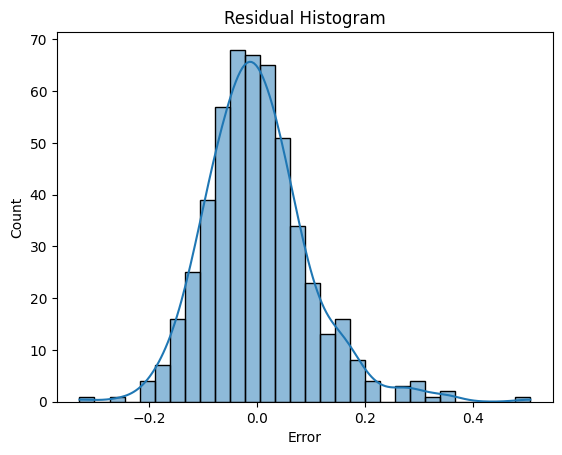

In [455]:
# Getting the prediction on train data
checkmodel = smmodel(X_train)
X_train_pred = sm.add_constant(X_train)
y_pred_train = checkmodel.predict(X_train_pred)

#Error between prediction and actual
error1 = y_pred_train - y_train
sns.histplot(error1,kde=True)
plt.title('Residual Histogram')
plt.xlabel('Error')
plt.show()

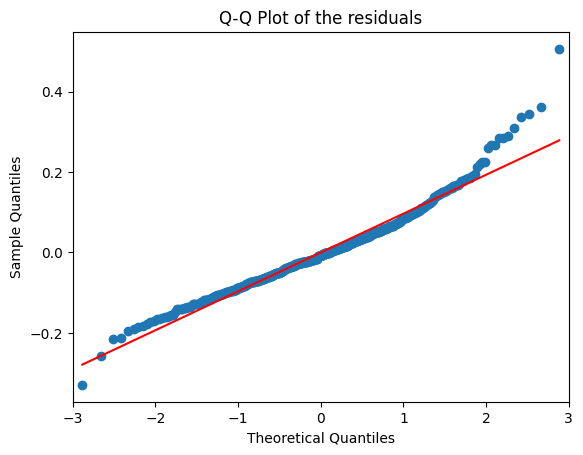

In [456]:
# Q-Q Plot for the residuals
sm.qqplot(error1, line='s')
plt.title('Q-Q Plot of the residuals')
plt.show()

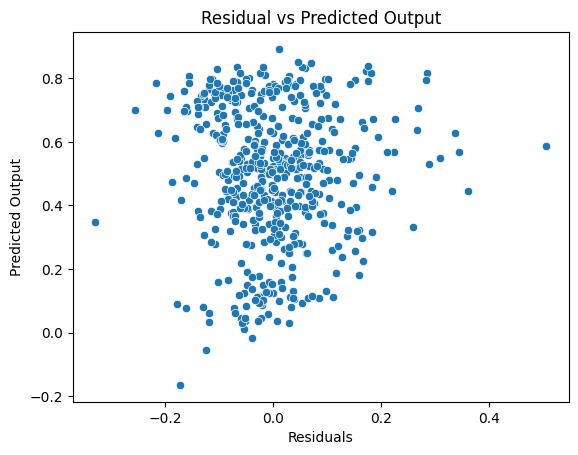

In [457]:
# Residual-Predicted output scatter plot (Check for Homoscedasticity and Linearity)
sns.scatterplot(x=error1,y=y_pred_train)
plt.title('Residual vs Predicted Output')
plt.xlabel('Residuals')
plt.ylabel('Predicted Output')
plt.show()

The errors have a mean of zero with a normal distribution. It is also verified in the Q-Q plot. There are no patterns in the residual-prediction plot. It is good to go for predictions on it.

In [458]:
# Let's scale the test dataset
data_test[[i for i in data_test.columns]] = scale.transform(data_test[[i for i in data_test.columns]])
data_test

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
469,1.0,0.0,0.0,0.543115,0.518248,0.422104,0.848606,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
149,0.0,0.0,1.0,0.758058,0.843709,0.479765,0.526017,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
303,0.0,0.0,1.0,0.324018,0.642765,0.386287,0.350115,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
356,0.0,0.0,0.0,0.453814,0.780592,0.062325,0.318363,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
516,1.0,0.0,1.0,0.773634,0.507943,0.433030,0.833877,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.0,0.0,1.0,0.497426,0.856161,0.590357,0.299771,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
533,1.0,0.0,1.0,0.664605,0.617003,0.306856,0.790414,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,1.0,0.0,0.0,0.838014,0.500644,0.146420,0.853314,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [459]:
# Let's get our X & y test datasets 
y_test = data_test.cnt
X_test = data_test[X_train.columns]
X_test

,yr_2019,holiday,temp,season_spring,season_winter,mnth_DEC,mnth_JUL,mnth_MAR,mnth_NOV,mnth_SEP,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,,,,,
469,1.0,0.0,0.543115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,0.0,0.0,0.758058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,0.0,0.0,0.324018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,0.0,0.0,0.453814,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
516,1.0,0.0,0.773634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.0,0.0,0.497426,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
533,1.0,0.0,0.664605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,1.0,0.0,0.838014,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [460]:
# Getting the model 
testmodel = smmodel(X_train)

In [461]:
# Adding the constant variable to the X_test and predicting the output
X_test_1 = sm.add_constant(X_test)
y_pred1 = testmodel.predict(X_test_1)

In [462]:
# Let's find the r2 score and adjusted r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_pred1,y_test)

In [463]:
# Adjusted r2 score is given with the below formula
n = X_test_1.shape[0]
p = X_test_1.shape[1]

def adjr2 (r2,n,p):
    return 1-(((1-r2)*(n-1))/(n-p-1))
print(r2,adjr2(r2,n,p))

0.7651576921661781 0.7502652531328138


Although the model seems to performing well enough with R2 score of 0.76 and adjusted R2 score of 0.75, let's check if we can still improve it by reducing a few variables

Let's remove the variables manually using the RFE technique (Remove the variables having the least absolute coefficient values)

In [464]:
# Let's see the last model's statistics to identify the coefficients with least absolute value
smmodel(X_train).params.abs().sort_values()

mnth_JUL            0.050459
mnth_SEP            0.051853
mnth_MAR            0.056891
mnth_DEC            0.060541
holiday             0.070885
mnth_NOV            0.082498
weathersit_Mist     0.084405
season_winter       0.093989
season_spring       0.159024
const               0.197305
yr_2019             0.241359
weathersit_L_S/R    0.287060
temp                0.428703
dtype: float64

We could see that the first 4 columns in the result have a low absolute coefficient values. Hence let's drop those and see the model statistics.

In [465]:
X_train_rfe = X_train.drop(['mnth_JUL','mnth_SEP','mnth_MAR','mnth_DEC'],axis=1)
X_train_rfe

,yr_2019,holiday,temp,season_spring,season_winter,mnth_NOV,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,
684,1.0,0.0,0.327133,0.0,1.0,1.0,0.0,1.0
646,1.0,1.0,0.403972,0.0,1.0,0.0,0.0,1.0
164,0.0,0.0,0.717562,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.331287,1.0,0.0,0.0,0.0,1.0
641,1.0,0.0,0.745598,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
701,1.0,0.0,0.359323,0.0,1.0,0.0,0.0,1.0
72,0.0,0.0,0.405237,1.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.495350,0.0,0.0,0.0,0.0,0.0


In [466]:
# Let's see the model stats
smmodel(X_train_rfe).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.68e-176
Time:                        22:14:22   Log-Likelihood:                 443.76
No. Observations:                 510   AIC:                            -869.5
Df Residuals:                     501   BIC:                            -831.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2016      0.025      8.042      0.000       0.152       0.251
yr_2019              0.2406      0.009     26.412      0.000       0.223       0.258
holiday             -0.0791      0.028     -2.838      0.005      -0.134      -0.024
temp                 0.4220      0.033     12.808      0.000       0.357       0.487
season_spring       -0.1600      0.018     -8.894      0.000      -0.195      -0.125
season_winter        0.0826      0.015      5.654      0.000       0.054       0.111
mnth_NOV            -0.0730      0.019     -3.765      0.000      -0.111      -0.035
weathersit_L_S/R    -0.2885      0.027    -10.525      0.000      -0.342      -0.235
weathersit_Mist     -0.0804      0.010     -8.280      0.000      -0.100      -0.061
==============================================================================
Omnibus:                       65.678   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.736
Skew:                          -0.735   Prob(JB):                     2.48e-29
Kurtosis:                       5.009   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [467]:
# Let's see the variables' VIFs
vif_df(X_train_rfe)

,Columns,VIF
2,temp,2.173338
0,yr_2019,2.067545
4,season_winter,1.952056
5,mnth_NOV,1.600439
7,weathersit_Mist,1.515964
3,season_spring,1.232718
6,weathersit_L_S/R,1.051670
1,holiday,1.038499


This model seems to be even more better as it has all large variables coefficients, low VIF and low p-values and a R2 score of 0.812 and an Adjusted R2 score of 0.809.

Let's check this model's residuals, prediction and its R2 and Adjusted R2 score

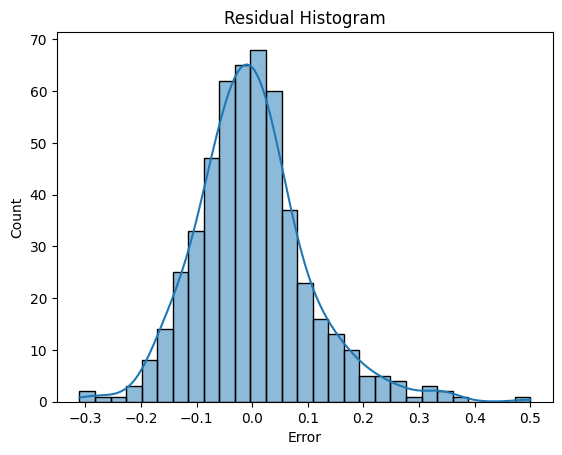

In [468]:
# Getting the prediction on train data
checkmodel2 = smmodel(X_train_rfe)
X_train_pred2 = sm.add_constant(X_train_rfe)
y_pred_train2 = checkmodel2.predict(X_train_pred2)

#Error between prediction and actual
error2 = y_pred_train2 - y_train
sns.histplot(error2,kde=True)
plt.title('Residual Histogram')
plt.xlabel('Error')
plt.show()

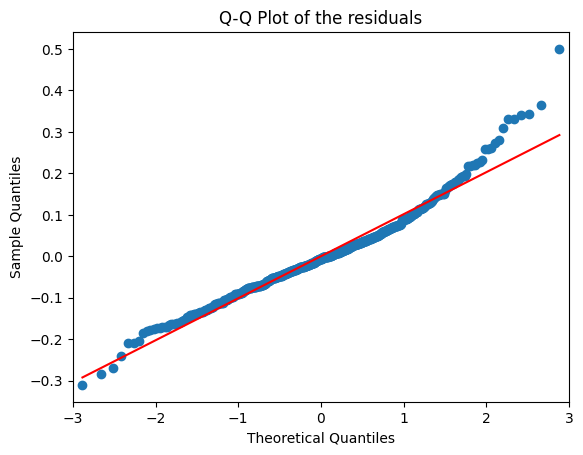

In [469]:
# Q-Q Plot for the residuals
sm.qqplot(error2, line='s')
plt.title('Q-Q Plot of the residuals')
plt.show()

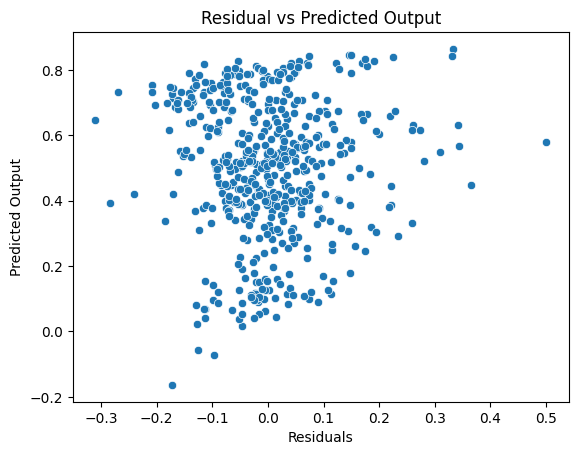

In [470]:
# Residual-Predicted output scatter plot (Check for Homoscedasticity and Linearity)
sns.scatterplot(x=error2,y=y_pred_train2)
plt.title('Residual vs Predicted Output')
plt.xlabel('Residuals')
plt.ylabel('Predicted Output')
plt.show()

The errors have a mean of zero with a normal distribution. It is also verified in the Q-Q plot. There are no patterns in the residual-prediction plot. It is good to go for predictions on it.

In [471]:
# Instantiating the model
finalmodal = smmodel(X_train_rfe)

In [472]:
# Let's get the X & y data
y_test = data_test.cnt
X_test = data_test[X_train_rfe.columns]
X_test

,yr_2019,holiday,temp,season_spring,season_winter,mnth_NOV,weathersit_L_S/R,weathersit_Mist
instant,,,,,,,,
469,1.0,0.0,0.543115,0.0,0.0,0.0,0.0,0.0
149,0.0,0.0,0.758058,0.0,0.0,0.0,0.0,0.0
303,0.0,0.0,0.324018,0.0,1.0,0.0,0.0,0.0
356,0.0,0.0,0.453814,1.0,0.0,0.0,0.0,1.0
516,1.0,0.0,0.773634,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
333,0.0,0.0,0.497426,0.0,1.0,1.0,0.0,1.0
533,1.0,0.0,0.664605,0.0,0.0,0.0,0.0,0.0
559,1.0,0.0,0.838014,0.0,0.0,0.0,0.0,1.0


In [473]:
# Predict the model output
X_test_2 = sm.add_constant(X_test)
y_pred2 = finalmodal.predict(X_test_2)

In [474]:
# Check the r2 and adjusted r2 score of the predicted values
final_r2 = r2_score(y_pred2, y_test)
final_n = X_test_2.shape[0]
final_p = X_test_2.shape[1]
final_adjr2 = adjr2(final_r2,final_n,final_p)
print(f'final_r2: {final_r2}, final_adjr2: {final_adjr2}')

final_r2: 0.7584830658525565, final_adjr2: 0.7480828150997958


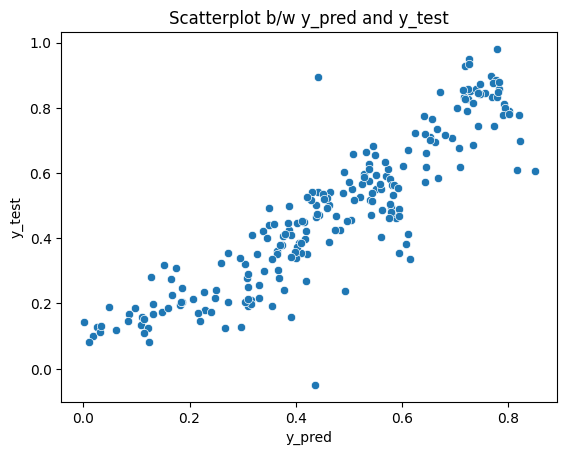

In [475]:
# Let's check the plot between predicted output and actual output

sns.scatterplot(x=y_pred2,y=y_test)
plt.title('Scatterplot b/w y_pred and y_test')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

We could see that the model performed very good at predicting the actual output. Let's see the coefficients of the model.

In [476]:
# Coefficients of the model
finalmodal.params

const               0.201614
yr_2019             0.240593
holiday            -0.079060
temp                0.421974
season_spring      -0.159984
season_winter       0.082564
mnth_NOV           -0.073049
weathersit_L_S/R   -0.288466
weathersit_Mist    -0.080440
dtype: float64

The final model with 8 variables seems to be good at predicting the output.
- R2 score of 0.758: 75.8% of the total variance in the bike demand is explained by the model, which is retained with an Adjusted R2 score of 74.8% considering the number of predictors.
- All the features in the model have low p-values (0 and close to 0), indicating that they are statistically significant.
- Low VIF values implies that the model has least multicollinearity, ensuring the features to be reliable.
- High absolute coefficients, hence the predictors have a meaningful impact on the prediction.